In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [256]:
data = pd.read_csv("/Users/orishemer/PycharmProjects/Data_challenge_IML/house_prices2.csv")
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [257]:
# split data

In [258]:

raw_data2 = data[['CreditScore', 'Geography',
                      'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                      'IsActiveMember', 'EstimatedSalary', 'Exited']]

new_raw_data = pd.get_dummies(raw_data2, columns=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])

scale_vars = ['CreditScore', 'EstimatedSalary', 'Balance', 'Age']
scaler = MinMaxScaler()
new_raw_data[scale_vars] = scaler.fit_transform(new_raw_data[scale_vars])
X = new_raw_data.drop('Exited', axis=1).values  # Input features (attributes)
y = new_raw_data['Exited'].values  # Target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=0)

In [259]:
# SVM classifier

In [260]:
# from sklearn.svm import SVC
# model_SVC = SVC(kernel = 'rbf', random_state = 4)
# model_SVC.fit(X_train, y_train)
#
# y_pred_svm = model_SVC.predict_proba(X_test)

In [261]:
# Logistic Classifier

In [262]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.predict_proba(X_test)

In [263]:
#k nearest neighbors

In [264]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred_neigh = neigh.predict_proba(X_test)

In [265]:
#k random forest

In [266]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,criterion='entropy')
forest.fit(X_train, y_train)
y_pred_forest = forest.predict_proba(X_test)

In [267]:
#Plot ROC and compare AUC

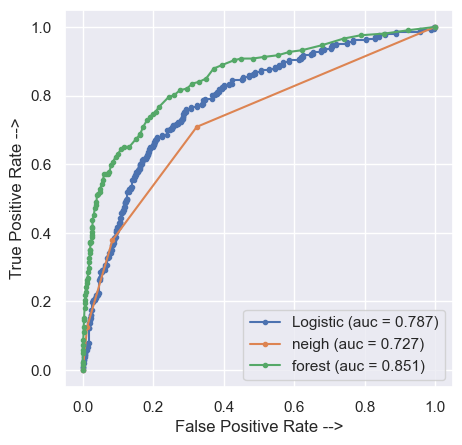

In [268]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred_logistic = y_pred_logistic[:,1]
y_pred_neigh = y_pred_neigh[:,1]
y_pred_forest= y_pred_forest[:,1]

logistic_fpr, logistic_tpr, threshold_test = roc_curve(y_test, y_pred_logistic)
auc_logistic = roc_auc_score(y_test, y_pred_logistic)

neigh_fpr, neigh_tpr, neigh_threshold = roc_curve(y_test, y_pred_neigh)
auc_neigh = roc_auc_score(y_test, y_pred_neigh)

forest_fpr, forest_tpr, forest_threshold = roc_curve(y_test, y_pred_forest)
auc_forest = roc_auc_score(y_test, y_pred_forest)

plt.figure(figsize=(5, 5), dpi=100)
# plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(neigh_fpr, neigh_tpr, marker='.', label='neigh (auc = %0.3f)' % auc_neigh)
plt.plot(forest_fpr, forest_tpr, marker='.', label='forest (auc = %0.3f)' % auc_forest)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()